In [1]:

import tensorflow as tf
import numpy
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [23]:
import matplotlib.pyplot as plt
def plot_chart(y,x,title="",xlabel="Epochs",ylabel=""):
    plt.plot(y, x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [29]:
# Use Logistic Regression from our previous example

# Parameters
learning_rate = 0.01
training_epochs = 20
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder("float", [None, 784], name='x') # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10], name='y') # 0-9 digits recognition => 10 classes

# Create model

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name="weights")
b = tf.Variable(tf.zeros([10]), name="bias")

# Construct model
activation = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = -tf.reduce_sum(y*tf.log(activation)) # Cross entropy
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # Gradient Descent

# Test model
correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Initializing the variables
init = tf.global_variables_initializer()


Epoch: 0001 cost= 30.414084282 Val-accuracy= 0.9164
Epoch: 0002 cost= 22.194046442 Val-accuracy= 0.9216
Epoch: 0003 cost= 20.944067214 Val-accuracy= 0.9202
Epoch: 0004 cost= 20.522232871 Val-accuracy= 0.9176
Epoch: 0005 cost= 20.171024388 Val-accuracy= 0.9248
Epoch: 0006 cost= 19.826642370 Val-accuracy= 0.9188
Epoch: 0007 cost= 19.872983392 Val-accuracy= 0.9276
Epoch: 0008 cost= 19.529406678 Val-accuracy= 0.9164
Epoch: 0009 cost= 19.343899391 Val-accuracy= 0.9222
Epoch: 0010 cost= 19.170681849 Val-accuracy= 0.92
Epoch: 0011 cost= 19.153984811 Val-accuracy= 0.9222
Epoch: 0012 cost= 19.048611489 Val-accuracy= 0.9176
Epoch: 0013 cost= 18.806421081 Val-accuracy= 0.9182
Epoch: 0014 cost= 18.793664507 Val-accuracy= 0.9228
Epoch: 0015 cost= 18.783513702 Val-accuracy= 0.9178
Epoch: 0016 cost= 18.576175834 Val-accuracy= 0.912
Epoch: 0017 cost= 18.570432340 Val-accuracy= 0.9208
Epoch: 0018 cost= 18.592964152 Val-accuracy= 0.9206
Epoch: 0019 cost= 18.456056259 Val-accuracy= 0.9236
Epoch: 0020 cos

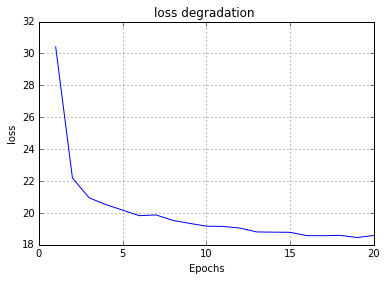

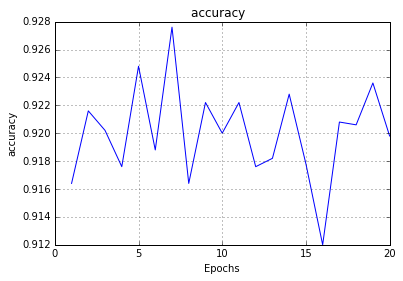

In [30]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Set logs writer into folder /tmp/tensorflow_logs
    summary_writer = tf.summary.FileWriter('/tmp/tensorflow_logs', graph=sess.graph)

    # Training cycle
    epochs = []
    loss = []
    accuracies = []
    for epoch in range(training_epochs):
        plt.close()
        epochs.append(epoch+1)
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
        acc = accuracy.eval({x: mnist.validation.images, y: mnist.validation.labels})
        loss.append(avg_cost)
        accuracies.append(acc)
        # Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}" .format(avg_cost), "Val-accuracy=", acc
            
    print "Optimization Finished!"
    
    print "Final Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels})
    plot_chart(epochs,loss,title="loss degradation ",ylabel="loss")
    plot_chart(epochs,accuracies,title="accuracy  ",ylabel="accuracy")